# Initialization

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns


## read and prepare data

In [155]:
df = pd.read_excel(r'sc2 unit stats.xlsx')


In [163]:
df = df.replace('-', np.nan)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit           69 non-null     object 
 1   Tier           57 non-null     object 
 2   Race           69 non-null     object 
 3   Supply         56 non-null     float64
 4   Minerals       63 non-null     float64
 5   Gas            61 non-null     float64
 6   Building time  67 non-null     object 
 7   Size           69 non-null     object 
 8   Cargo          36 non-null     float64
 9   Armor          69 non-null     object 
 10  HP             69 non-null     object 
 11  Shields        69 non-null     int64  
 12  Attribut       69 non-null     object 
 13  Ground attack  49 non-null     object 
 14  Air attack     24 non-null     object 
 15  Bonus          25 non-null     object 
 16  Ground DPS     49 non-null     object 
 17  Air DPS        25 non-null     object 
 18  Bonus DPS   

In [183]:
for column in ['HP', 'Armor']:
    print(column)
    for i in df[column].index:
        value = df[column][i]

        # catch values str like '45 (+10)', but not int 45
        if type(value) is str:
            base = int(value.split('(')[0])
            bonus = int(value[value.find('(')+1 : value.find(')')])
            print(f'{value} -> {base}, {bonus}')
            df.at[i, column] = base
            df.at[i, column+'_bonus'] = bonus
    print(df[column].unique())
    print(df[column+'_bonus'].unique())

HP
[20 100 40 80 70 10 200 120 150 300 350 45 60 125 90 135 175 400 180 140
 550 1500 250 25 35 30 145 160 50 500 5 225]
[nan 10 5]
Armor
[0 1 2 3 10]
[ 1. nan  2.]


12

In [156]:
df['Psionic'] = df.Attribut.str.contains('P')

In [186]:
# tier_values = {'-':0, 'D':1, 'C':2, 'B':4, 'A':8, 'S':16}
tier_values = {np.NAN:0, 'D':1, 'C':2, 'B':3, 'A':4, 'S':5}
df['Tier_value'] = df.Tier.apply(lambda x: tier_values[x])

In [108]:
# df = df.set_index('Unit')

In [126]:
df.HP.unique()

array([20, 100, 40, 80, 70, 10, 200, 120, 150, 300, 350, 45, 60,
       '45 (+10)', 125, 90, 135, 175, 400, 180, 140, 550, 1500, 250, 25,
       35, '30 (+5)', 145, 160, 50, 500, 5, 225, 30], dtype=object)

array([  20,  100,   40,   80,   70,   10,  200,  120,  150,  300,  350,
         45,   60,  125,   90,  135,  175,  400,  180,  140,  550, 1500,
        250,   25,   35,   30,  145,  160,   50,  500,    5,  225])

In [153]:
# df.HP.apply(lambda x: str(x)[str(x).find('(')+1 : str(x).find(')')]).unique()
#

array(['2', '10', '4', '8', '7', '1', '20', '12', '15', '30', '35', '6',
       '+10', '9', '13', '17', '40', '18', '14', '55', '150', '25', '3',
       '+5', '16', '5', '50', '', '22'], dtype=object)

In [172]:
for i in df.HP.index:
    value = df.HP[i]
    if type(value) is str:
        bonus = int(value[value.find('(')+1 : value.find(')')])
        print(f'{value} -> {bonus}')
        df.at[i, 'HP_bonus'] = bonus
df.HP_bonus.unique()


45 (+10) -> 10
30 (+5) -> 5


array([nan, 10, 5], dtype=object)

In [154]:
df.HP = df.HP.apply(lambda x:str(x).split(' (')[0]).astype(int)



In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unit           69 non-null     object
 1   Tier           69 non-null     object
 2   Race           69 non-null     object
 3   Supply         69 non-null     object
 4   Minerals       69 non-null     object
 5   Gas            69 non-null     object
 6   Building time  69 non-null     object
 7   Size           69 non-null     object
 8   Cargo          69 non-null     object
 9   Armor          69 non-null     object
 10  HP             69 non-null     object
 11  Shields        69 non-null     int64 
 12  Attribut       69 non-null     object
 13  Ground attack  69 non-null     object
 14  Air attack     69 non-null     object
 15  Bonus          69 non-null     object
 16  Ground DPS     69 non-null     object
 17  Air DPS        69 non-null     object
 18  Bonus DPS      69 non-null     o

## seaborn setup

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')


In [42]:
sc_race_colors = {
    'Protoss':'#edc124',
    'Terran':'#386ca8',
    'Zerg':'#953e9e'
}

tiers_order = ['S','A','B','C','D']

sc_psionic_colors = {True:'#b853c9', False:'#8c8c8c'}

# Visualization
## Compare races

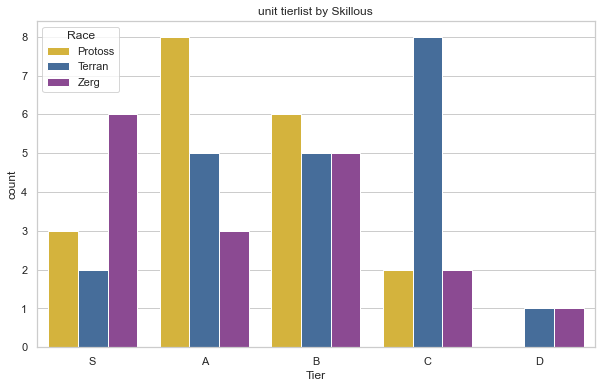

In [72]:
sns.countplot(x='Tier', hue='Race', data=df[df.Tier != '-'],
              order=tiers_order,
              palette=sc_race_colors)\
    .set_title('unit tierlist by Skillous');

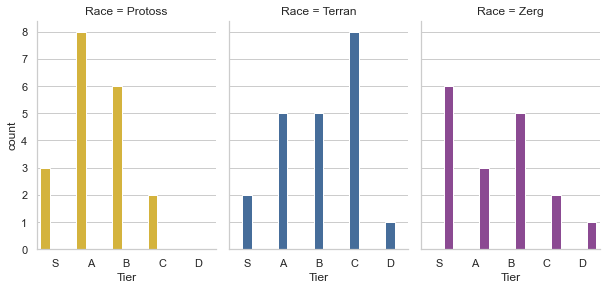

In [26]:
sns.catplot(x="Tier", hue="Race", col="Race",
            data=df[df.Tier != '-'], kind="count",
            order=tiers_order, palette=sc_race_colors,
            height=4, aspect=.7);

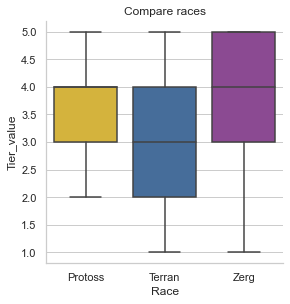

In [80]:
g = sns.catplot(x="Race", y='Tier_value',
            data=df[df.Tier != '-'],
            kind='box',
            palette=sc_race_colors,
            height=4)
g.ax.set_title('Compare races');

In [78]:
df[df.Race=='Protoss'][df.Tier=='S'].Unit

C:\Users\Mihail\AppData\Local\Temp/ipykernel_2152/434247742.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Race=='Protoss'][df.Tier=='S'].Unit


5     High Templar
9       Warp Prism
14        Void Ray
Name: Unit, dtype: object

## Casters vs other units

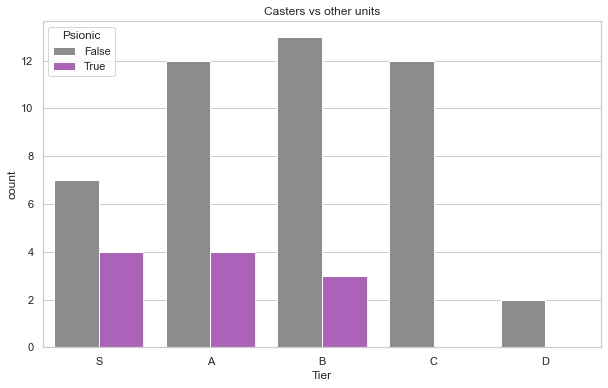

In [43]:
sns.countplot(x='Tier', hue='Psionic', data=df[df.Tier != '-'],
              order=tiers_order,
              palette=sc_psionic_colors)\
    .set_title('Casters vs other units');

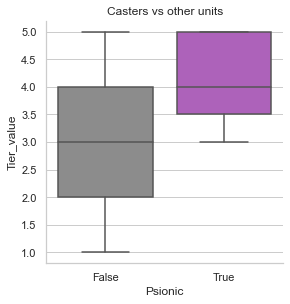

In [81]:
g = sns.catplot(x="Psionic", y='Tier_value',
            data=df[df.Tier != '-'],
            kind='box',
            palette=sc_psionic_colors,
            height=4)
g.ax.set_title('Casters vs other units');

## Checking dependence of the rating on other parameters

In [ ]:
sns.scatterplot(x=)